# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mouse_count = mouse_data['Mouse ID'].nunique()
mouse_count

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_series = mouse_data.duplicated(["Mouse ID", "Timepoint"], keep=False)
bad_mice = mouse_data[duplicate_row_series]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [69]:
bad_mouse_row_series = mouse_data["Mouse ID"].isin(bad_mice)

In [75]:
# Create a clean DataFrame by dropping the duplicate mice by ID.
clean_mouse_data=mouse_data[~bad_mouse_row_series]

In [76]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_groupby=clean_mouse_data.groupby("Drug Regimen")
mean=mouse_groupby.mean(numeric_only=True)["Tumor Volume (mm3)"]
median=mouse_groupby.median(numeric_only=True)["Tumor Volume (mm3)"]
var=mouse_groupby.var(numeric_only=True)["Tumor Volume (mm3)"]
std=mouse_groupby.std(numeric_only=True)["Tumor Volume (mm3)"]
sem=mouse_groupby.sem(numeric_only=True)["Tumor Volume (mm3)"]

mouse_summary=pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":var,
    "Tumor Volume Std. Dev":std,
    "Tumor Volume SEM":sem
})
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_mouse_data.groupby("Drug Regimen").agg(["mean","median","var","std","sem"]) 
# Using the aggregation method, produce the same summary statistics in a single line


TypeError: agg function failed [how->mean,dtype->object]

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed TimePoints'>

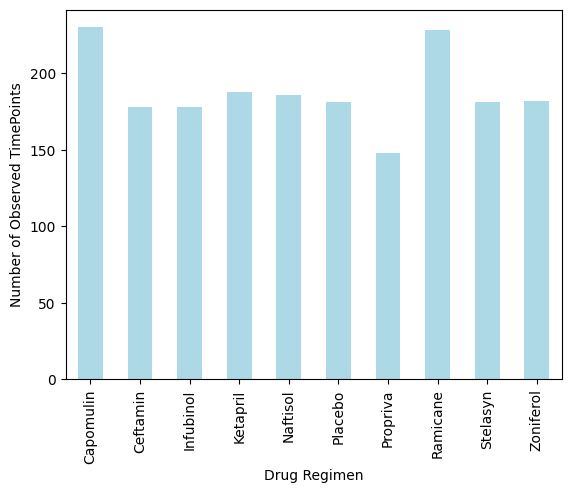

In [171]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo",
       "Propriva","Ramicane","Stelasyn","Zoniferol"]
regimen_count = mouse_groupby["Mouse ID"].count()
regimen_count.plot(kind="bar", color="lightblue", align="center", 
                   xlabel='Drug Regimen', ylabel=('Number of Observed TimePoints'))
                   

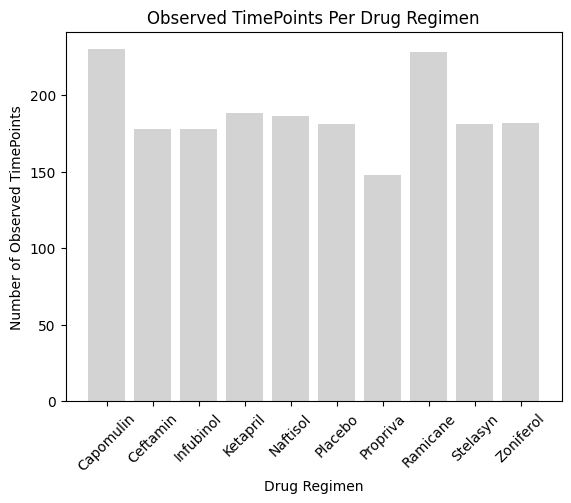

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo",
       "Propriva","Ramicane","Stelasyn","Zoniferol"]
regimen_count=mouse_groupby["Mouse ID"].count()
plt.bar(drugs,regimen_count,color="lightgray",align="center")

#labels
plt.title('Observed TimePoints Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed TimePoints')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

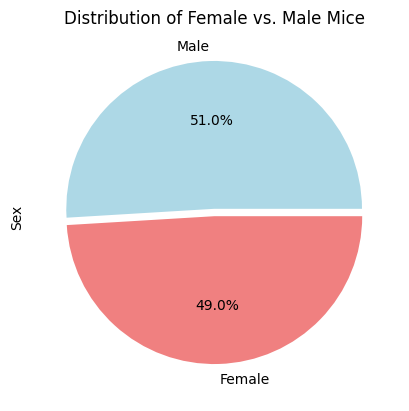

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=clean_mouse_data["Sex"].value_counts()
gender.plot(kind="pie",autopct="%1.1f%%", colors=["lightblue","lightcoral"], 
            explode=(0.05, 0), title=("Distribution of Female vs. Male Mice"),
            ylabel="Sex")

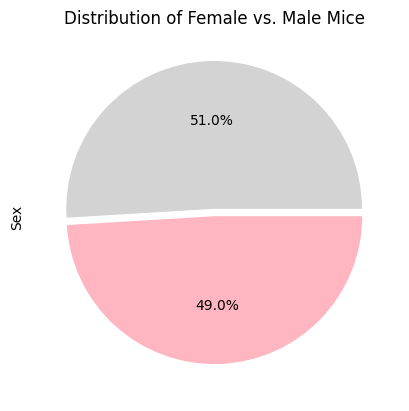

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=clean_mouse_data["Sex"].value_counts()
plt.pie(gender,autopct="%1.1f%%", colors=["lightgray","lightpink"], explode=(0.05, 0))

plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment
#regimens:  
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume 
# at the last timepoint
final_clean_df=pd.merge(last_timepoint, clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")
#print(final_clean_df.shape)
final_clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [121]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#for each promising treatment
for treatment in treatments:

    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    treatment_data = final_clean_df[final_clean_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
   
    # add this drug tumor vol series to tumor_vol_data
    tumor_vol_data.append(treatment_data)
    
# Calculate the quartiles and IQR
quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile

# Determine outliers within this drug using IQR and upper and lower bounds
lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)

# Identify potential outliers
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

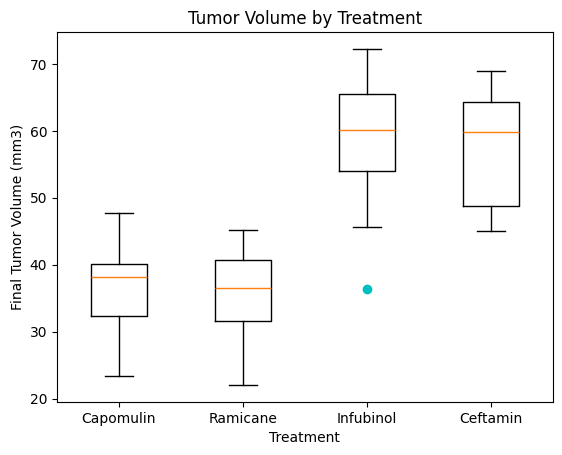

In [122]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, sym='c')

# Add labels and title
plt.title('Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

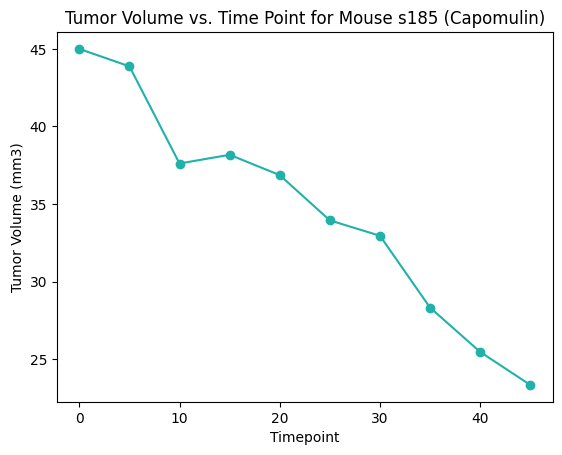

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_mouse_data[clean_mouse_data['Drug Regimen'] == "Capomulin"]
capomulin

chosen_one = 's185'
chosen_one_data = capomulin[capomulin['Mouse ID'] == chosen_one]

# Create a line plot
plt.plot(chosen_one_data['Timepoint'], chosen_one_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='lightseagreen')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {chosen_one} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

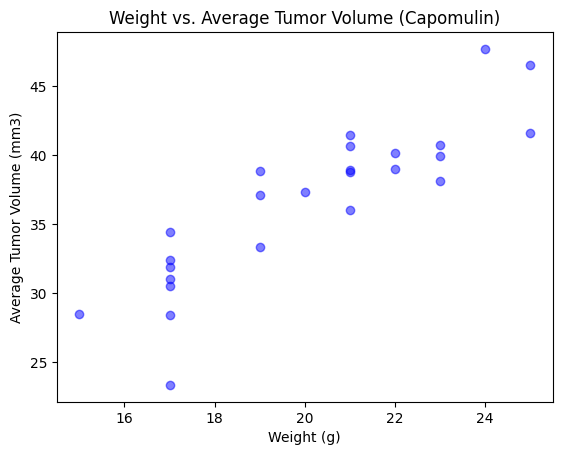

In [173]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin-treated mice
capomulin_data = final_clean_df[final_clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse weight
Average_tumor_df = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_actual', '_average'))

# Create a scatter plot
plt.scatter(Average_tumor_df['Weight (g)'], Average_tumor_df['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', alpha=0.5)

# Add labels and title
plt.title('Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

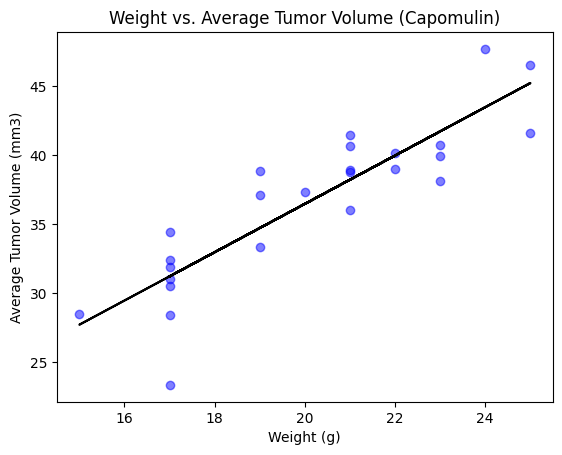

In [145]:
# linear regression
slope, intercept, r_value, p_value, std_err = linregress(Average_tumor_df['Weight (g)'], Average_tumor_df['Tumor Volume (mm3)_average'])
plt.scatter(Average_tumor_df['Weight (g)'], Average_tumor_df['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', alpha=0.5)

# Add the regression line to the plot
regress_line = slope * Average_tumor_df['Weight (g)'] + intercept
plt.plot(Average_tumor_df['Weight (g)'], regress_line, color='black')

# Add labels and title
plt.title('Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()